# Statistical Inference on the Composition of Red Wine
Group: 44

Members: Anthony Leong, Arav Dewan, Nikita Prabhu, Xiaomeng Zhou

### Introduction

As a commodity to be consumed, the quality of wine is of great importance, though it can differ greatly from wine to wine. A possible factor that influences the quality of a wine is its composition, so this study will aim to use statistical inference to determine if there is a significant difference between the compositions of different quality wines.

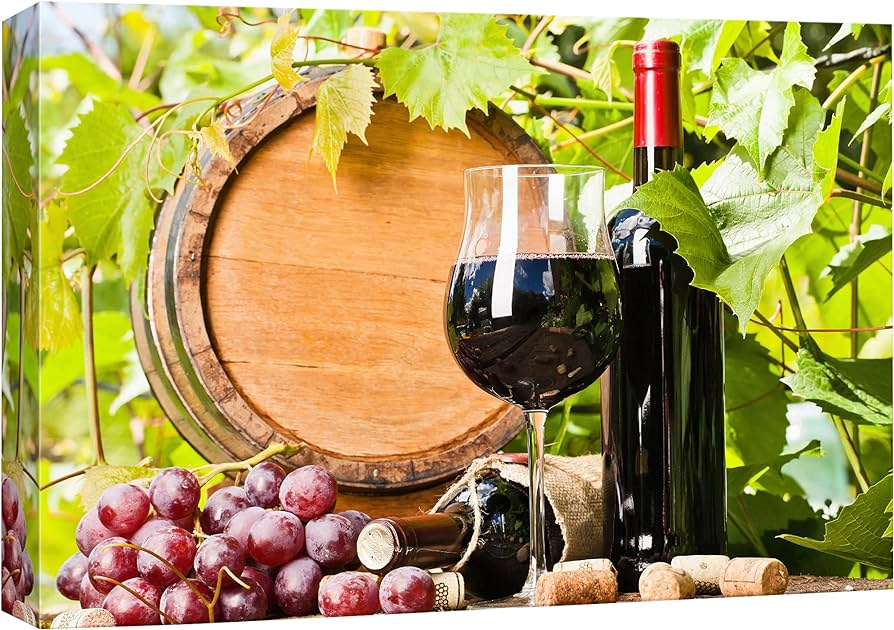

The dataset used is the [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) dataset from the UCI machine learning repository, and it consists of red and white variants of *vinho verde* wine. For this study, we will only be using red wine and we will classify each wine as either "low" or "high" quality.

Wine quality is linked to what is referred to as the sugar-acid balance, so understanding how the acidity of a wine affects its quality is of significant importance (White, 2019). Therefore, the variables of interest are `fixed_acidity` and `volatile_acidity`, and our research question is:

**Do fixed acidity and volatile acidity differ between different qualities of red wine?**

### Methods and Results

####Loading Necessary Packages

In [ ]:
#loading necessary packages
library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)
library(gridExtra)
install.packages("corrplot")
library(corrplot)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.92 loaded



#### Reading and Wrangling Data

In [ ]:
#reading dataset
options(repr.matrix.max.rows = 8)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
raw_wine_data <- read_delim(url, skip = 1, delim = ";",
                            col_names = c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
                                          "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide",
                                          "density", "pH", "sulphates", "alcohol", "quality"))
head(raw_wine_data)

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Table 1: Raw dataset of red wines

There are many possible ways to classify each wine as either "low" or "high" quality, but for this study, we will use the mean of quality as the cutoff between “low” and “high” quality.\
The average of the quality is obtained with `mean()`, and the average is stored in a variable named mean_quality using `summarize()`. After that, `filter()` selects the quality that is less than the mean_quality as a type of "LOW" quality to an object called `low_quality`. A similar ad before `filter()` is used to choose the quality greater than the mean_quality as a "HIGH" quality type to an object called `high_quality`.

In [ ]:
#converting quality to "HIGH" or "LOW"
mean_quality <- raw_wine_data |>
    summarize(mean_quality = mean(quality)) |>
    pull()

low_quality <- raw_wine_data |>
    filter(quality <= mean_quality) |>
    mutate(quality = "LOW")

high_quality <- raw_wine_data |>
    filter(quality > mean_quality) |>
    mutate(quality = "HIGH")

wine_data <- bind_rows(low_quality, high_quality)
head(wine_data)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,LOW
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,LOW
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,LOW
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,LOW
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,LOW
7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,LOW


Table 2: Dataset of red wines, classified as either "HIGH" or "LOW" quality

Now that each wine has been classified, we can compute summary statistics to estimate various parameters across each category of wine quality. Then, use `summarize()` to calculate summary statistics(mean, sd) for "LOW" and "HIGH" respectively, stored at `summary_stats`.

Also, `ggplot()` visualize the distributions of our two variables of interest across each category of wine quality, using `geom_histogram()` to turn the visualization into a histogram.

#### Summary Statistics

In [ ]:
#calculate summary statistics

low_quality_stats <- low_quality |>
    summarize(Quality = "LOW",
              n = n(),
              "Fixed_Acidity_Mean" = mean(fixed_acidity),
              "Fixed_Acidity_SD" = sd(fixed_acidity),
              "Volatile_Acidity_Mean" = mean(volatile_acidity),
              "Volatile_Acidity_SD" = sd(volatile_acidity))

high_quality_stats <- high_quality |>
    summarize(Quality = "HIGH",
              n = n(),
              "Fixed_Acidity_Mean" = mean(fixed_acidity),
              "Fixed_Acidity_SD" = sd(fixed_acidity),
              "Volatile_Acidity_Mean" = mean(volatile_acidity),
              "Volatile_Acidity_SD" = sd(volatile_acidity))

summary_stats <- bind_rows(low_quality_stats, high_quality_stats)
summary_stats

Quality,n,Fixed_Acidity_Mean,Fixed_Acidity_SD,Volatile_Acidity_Mean,Volatile_Acidity_SD
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LOW,744,8.142204,1.572396,0.5895027,0.1779562
HIGH,855,8.474035,1.862795,0.4741462,0.1619993


Table 3: Table of summary statistics

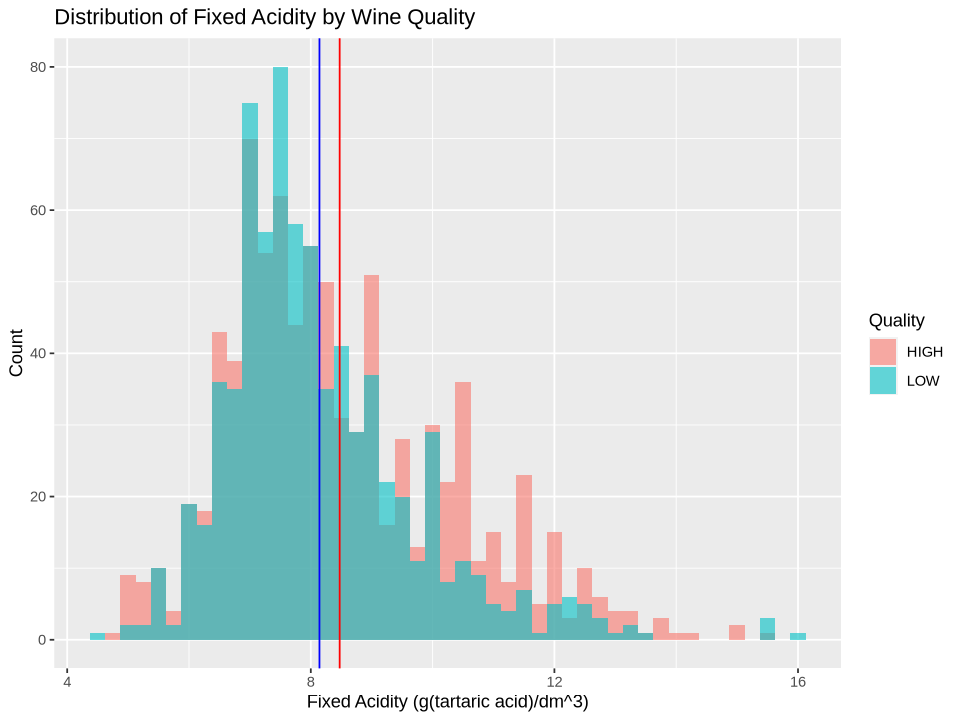

In [ ]:
#visualizing the distribution of fixed acidity by wine quality
options(repr.plot.width = 8, repr.plot.height = 6)

fixed_plot <- wine_data |>
    ggplot(aes(x = fixed_acidity, fill = quality)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 0.25) +
    geom_vline(xintercept = 8.474035, color = "red") +
    geom_vline(xintercept = 8.142204, color = "blue") +
    labs(x = "Fixed Acidity (g(tartaric acid)/dm^3)",
         y = "Count",
         title = "Distribution of Fixed Acidity by Wine Quality",
         fill = "Quality")
fixed_plot

Figure 1: Histogram comparing the distribution of `fixed_acidity` between different wine qualities. The blue line is the mean of `fixed_acidity` for "low" quality wines, and the red line is the mean of `fixed_acidity` for "high" quality wines.

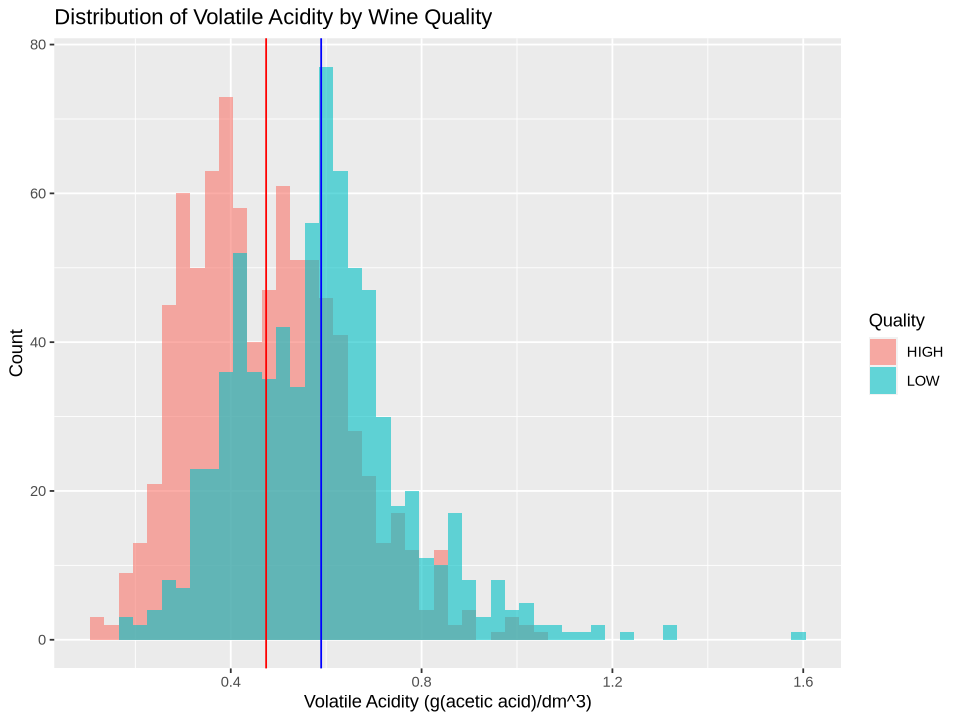

In [ ]:
#visualizing the distribution of volatile acidity by wine quality
options(repr.plot.width = 8, repr.plot.height = 6)

volatile_plot <- wine_data |>
    ggplot(aes(x = volatile_acidity, fill = quality)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 0.03) +
    geom_vline(xintercept = 0.4741462, color = "red") +
    geom_vline(xintercept = 0.5895027, color = "blue") +
    labs(x = "Volatile Acidity (g(acetic acid)/dm^3)",
         y = "Count",
         title = "Distribution of Volatile Acidity by Wine Quality",
         fill = "Quality")
volatile_plot

Figure 2: Histogram comparing the distribution of `volatile_acidity` between different wine qualities. The blue line is the mean of `volatile_acidity` for "low" quality wines, and the red line is the mean of `volatile_acidity` for "high" quality wines.

### Methods: Plan

Let $\mu_{fh}$, $\mu_{fl}$, $\mu_{vh}$, and $\mu_{vl}$ be defined as follows:

- $\mu_{fh}$ represents the population mean of `fixed_acidity` for "high" quality wines
- $\mu_{fl}$ represent the population mean of `fixed_acidity` for "low" quality wines
- $\mu_{vh}$ represent the population mean of `volatile_acidity` for "high" quality wines
- $\mu_{vl}$ represent the population mean of `volatile_acidity` for "low" quality wines

Hypothesis tests 1: \
$H_0$: $\mu_{fh} - \mu_{fl} = 0$\
$H_1$: $\mu_{fh} - \mu_{fl} \neq 0$

Hypothesis tests 2: \
$H_0$: $\mu_{vh} - \mu_{vl} = 0$\
$H_1$: $\mu_{vh} - \mu_{vl} \neq 0$

For both hypothesis tests, we will use $\alpha = 0.1$ as our significance level.

<font size="5">Constructing Confidence Intervals through bootstrapping</font>

<font size="3">Constructing Confidence Intervals through bootstrapping for `fixed_acidity`</font>
- First, we selected the needed variables quality and fixed_acidity from wine_data by `select()`, and assigned data to an object called `wine_quality_fa`.
- Second, we generate 1000 bootstrap samples by using the `infer` functions `specify()`, `generate()`, `and calculate()`, and assign data to an object called `bootstrapped_fa_1`.
- Third, we calculated the 90% confidence interval by piping the `bootstrapped_fa_1` data frame into the `get_confidence_interval()` function, and assigned data to an object called `c1_fa_1`.
- Finally, we visualize the confidence interval using the `infer` function `visualize()` and `shade_confidence_interval()`, and assign data to an object called `fa_plot1`.

The result of the confidence interval calculated by bootstrapping is [0.1950176, 0.4737029], which means that we are 90% “confident” that a 90% confidence interval captures the true mean of fixed acidity between different wine qualities("HIGH", "LOW").

In [ ]:
set.seed(123)
#CONSTRUCTING CONFIDENCE INTERVALS OF FIXED ACIDITY FOR HIGH QUALITY WINE
# Wine quality data selecting quality and fixed acidity
wine_quality_fa <- wine_data |>
select(quality,fixed_acidity)

#generate bootstrap resampling with replacement
bootstrapped_fa_1 <- wine_quality_fa %>%
    specify(formula = fixed_acidity~quality) %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in means",order = c("HIGH", "LOW"))
#calculate 90% confidence interval
c1_fa_1 <- bootstrapped_fa_1 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

#visualize the confidence interval
fa_plot1 <- visualize(bootstrapped_fa_1) +
  shade_confidence_interval(endpoints = c1_fa_1)+
  labs(x= "Difference in mean fixed acidity between high quality and low quality wine",title = "90% confidence interval for difference in mean fixed acidity")
c1_fa_1

lower_ci,upper_ci
<dbl>,<dbl>
0.1950176,0.4737029


<font size="3">Constructing Confidence Intervals through bootstrapping for `volatile_acidity`</font>

Same method as before, except, instead of the variable `fixed_acidity` we use `volatile_acidity`.

The result of the confidence interval calculated by bootstrapping is [-0.1289639, -0.1024549], which means that we are 90% “confident” that a 90% confidence interval captures the true mean of volatile acidity between different wine qualities("HIGH", "LOW").

In [ ]:
set.seed(123)
# Wine quality data selecting quality and volatile acidity
wine_quality_va <- wine_data |>
select(quality,volatile_acidity)

#generate bootstrap resampling with replacement
bootstrapped_va_1 <- wine_quality_va %>%
    specify(formula = volatile_acidity~quality) %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in means",order = c("HIGH", "LOW"))
#calculate 90% confidence interval
c1_va_1 <- bootstrapped_va_1 %>%
    get_confidence_interval(level = 0.90, type = "percentile")

#visualize the confidence interval
va_plot1 <- visualize(bootstrapped_va_1) +
  shade_confidence_interval(endpoints = c1_va_1)+
  labs(x= "Difference in mean volatile acidity between high quality and low quality wine",title = "90% confidence interval for difference in mean volatile acidity")
c1_va_1

lower_ci,upper_ci
<dbl>,<dbl>
-0.1286175,-0.1011156


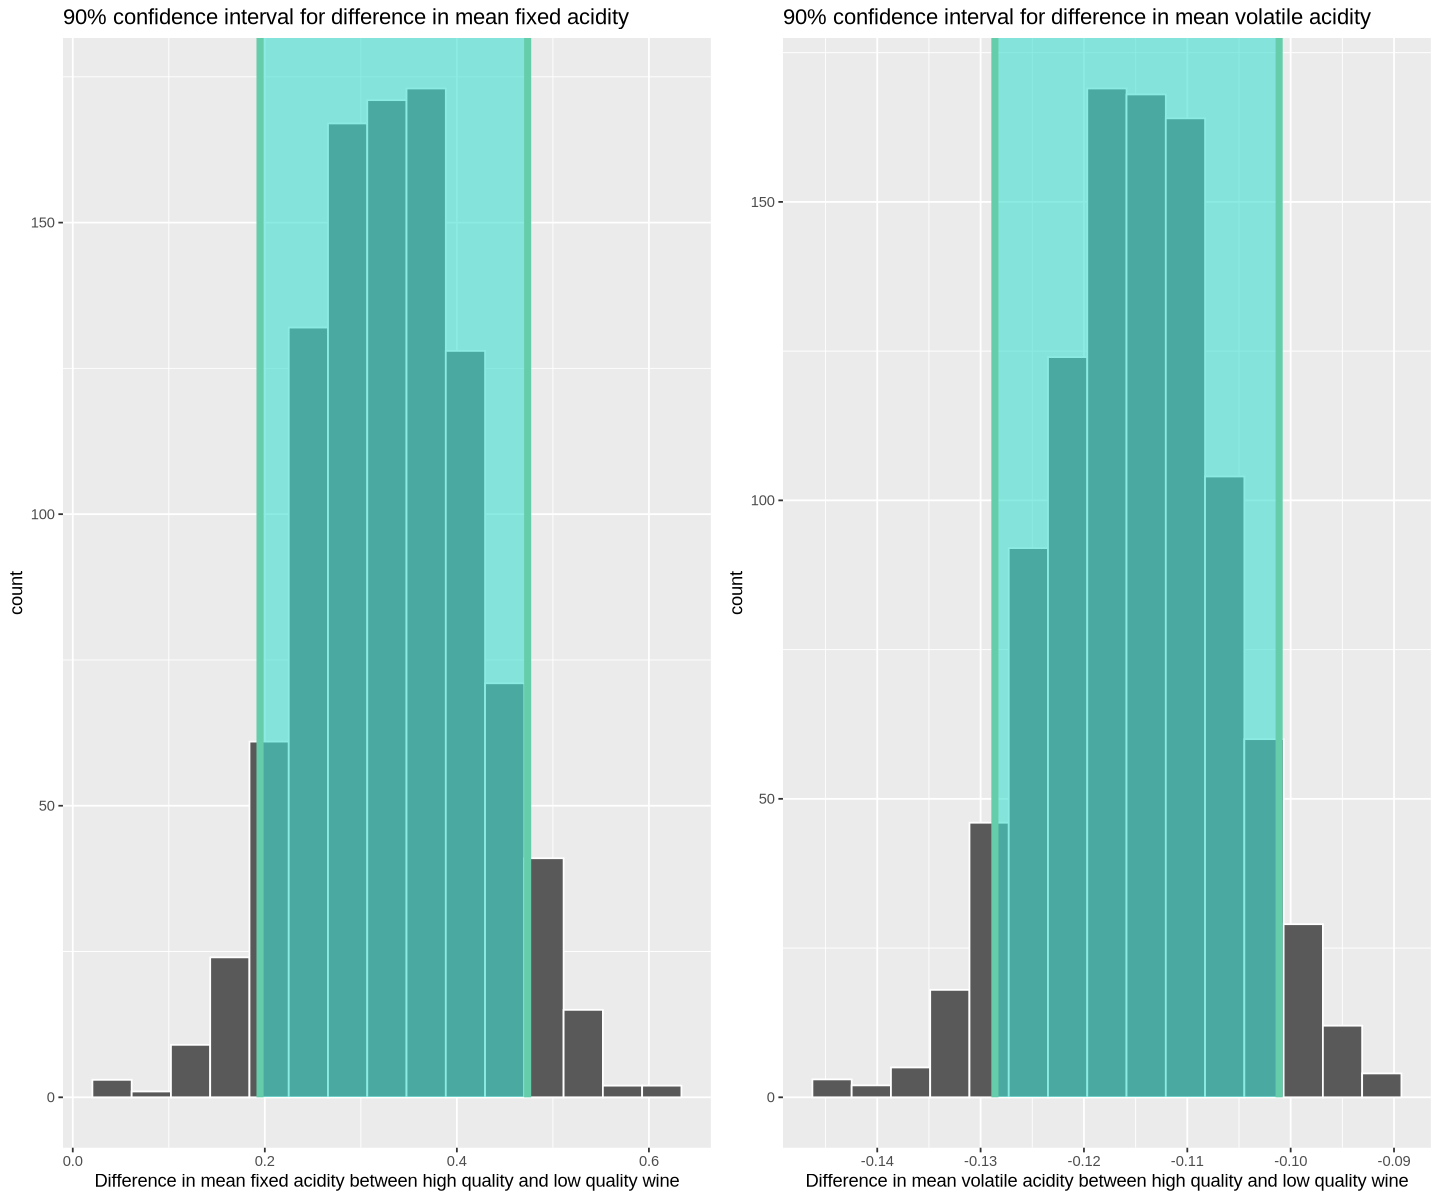

In [ ]:
options(repr.plot.width=12,repr.plot.height=10)
plot_grid(fa_plot1,va_plot1)

Figure 3

<font size="5">Constructing Confidence Intervals using CLT</font>

In [ ]:

fa_h_mean <- summary_stats$Fixed_Acidity_Mean[2]
fa_h_se <- summary_stats$Fixed_Acidity_SD[2]/sqrt(summary_stats$n[2])
fa_l_mean <- summary_stats$Fixed_Acidity_Mean[1]
fa_l_se <- summary_stats$Fixed_Acidity_SD[1]/sqrt(summary_stats$n[1])
fa_sd_diff <- sqrt((fa_h_se)^2+(fa_l_se)^2)
fa_diff_means <- fa_h_mean-fa_l_mean
#Calculating the confidence interval
fa_clt_ci <-
     tibble(lower_ci = fa_diff_means + qnorm(0.05) * sqrt((fa_h_se)^2+(fa_l_se)^2),
            upper_ci = fa_diff_means + qnorm(0.95) * sqrt((fa_h_se)^2+(fa_l_se)^2))
fa_clt_ci

clt_vs_bs_ci <-
    fa_plot1 +
geom_vline(data = fa_clt_ci, aes(xintercept=lower_ci), color="black", lwd = 1)+
geom_vline(data = fa_clt_ci, aes(xintercept=upper_ci), color="black", lwd = 1) +
labs(x= "Difference in mean fixed acidity between high quality and low quality wine",title = " 90% confidence interval thorugh Bootstrapping vs CLT")


lower_ci,upper_ci
<dbl>,<dbl>
0.1905108,0.4731508


In [ ]:
va_h_mean <- summary_stats$Volatile_Acidity_Mean[2]
va_h_se <- summary_stats$Volatile_Acidity_SD[2]/sqrt(summary_stats$n[2])
va_l_mean <- summary_stats$Volatile_Acidity_Mean[1]
va_l_se <- summary_stats$Volatile_Acidity_SD[1]/sqrt(summary_stats$n[1])
va_sd_diff <- sqrt((va_h_se)^2+(va_l_se)^2)
va_diff_means <- va_h_mean-va_l_mean
#Calculating the confidence interval
va_clt_ci <-
     tibble(lower_ci = va_diff_means + qnorm(0.05) * sqrt((va_h_se)^2+(va_l_se)^2),
            upper_ci = va_diff_means + qnorm(0.95) * sqrt((va_h_se)^2+(va_l_se)^2))
va_clt_ci

clt_vs_bs_ci_2<-
    va_plot1 +
geom_vline(data = va_clt_ci, aes(xintercept=lower_ci), color="black", lwd = 1)+
geom_vline(data = va_clt_ci, aes(xintercept=upper_ci), color="black", lwd = 1) +
labs(x= "Difference in mean volatile acidity between high quality and low quality wine",title = " 90% confidence interval thorugh Bootstrapping vs CLT")


lower_ci,upper_ci
<dbl>,<dbl>
-0.1294351,-0.1012779


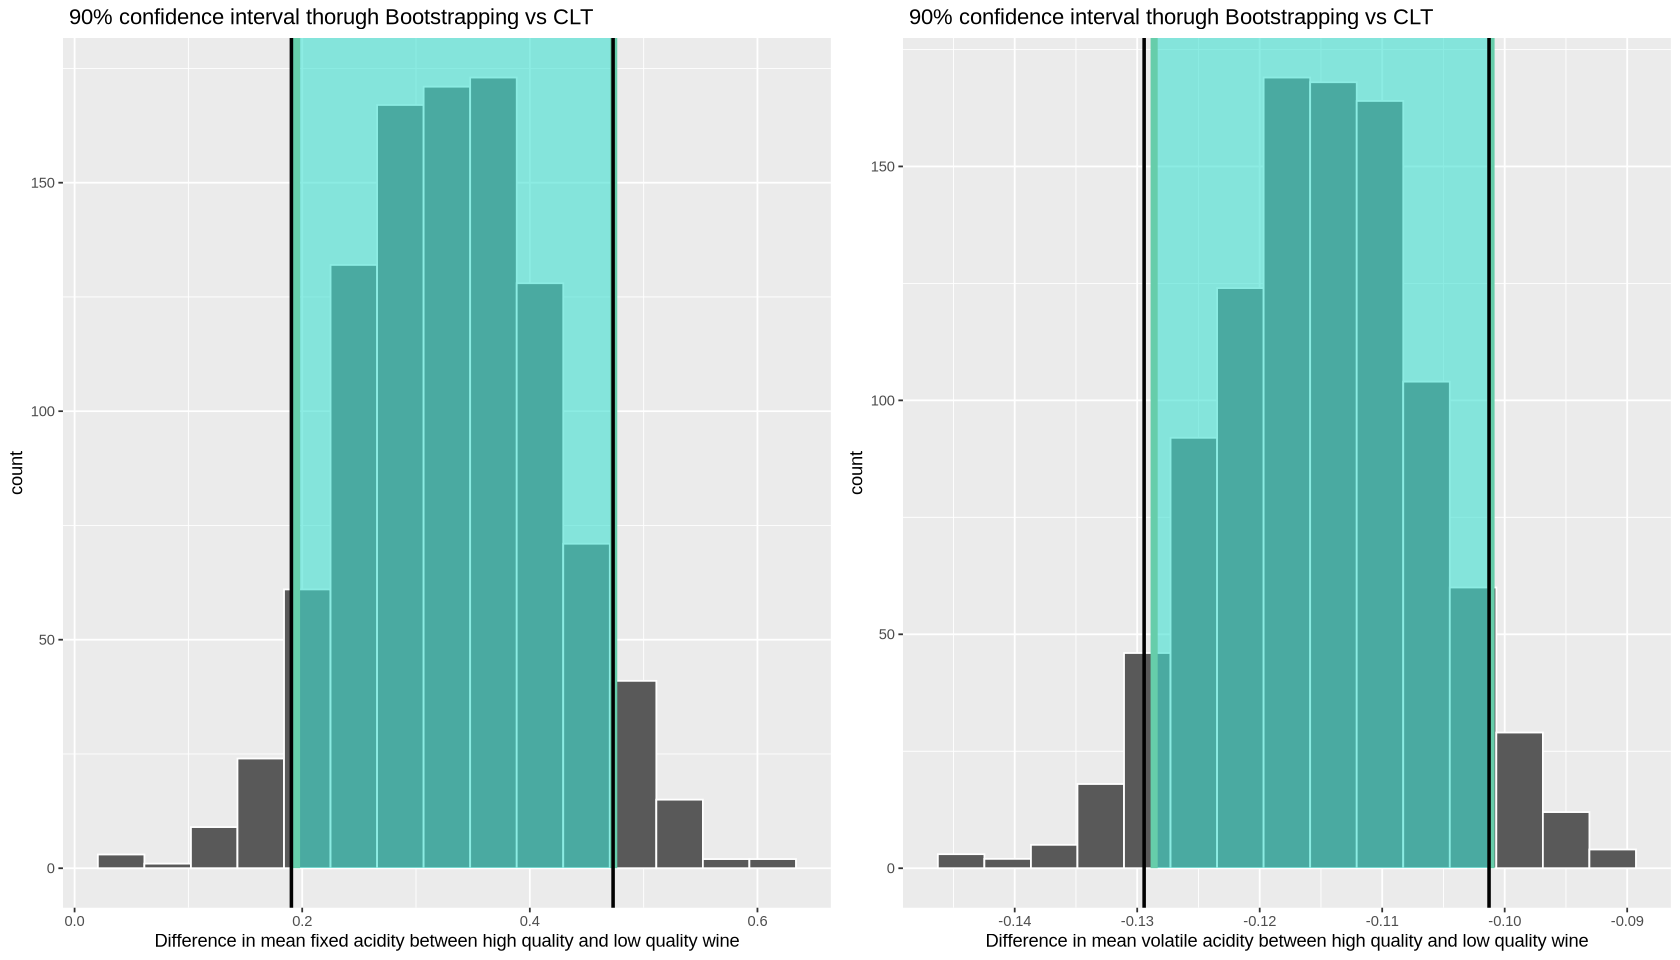

In [ ]:
options(repr.plot.width=14,repr.plot.height=8)
plot_grid(clt_vs_bs_ci,clt_vs_bs_ci_2)

Figure 4

<font size="5">Conducting Hypothesis testing via simulation using bootstraping</font>

Simulating from the null distribution
- First, Calculate the observed mean difference in fixed acidity, filter out the quality of two types of wine quality, and store it as a variable. Then, use `group_by()` to operate on the two types of wine quality separately. `summarize()` gets the mean of each type of fixed_acidity, using `pivot_wider()` to turn the horizontal axis into variable names and the vertical axis into data. `transmute()` turns two columns of data into one, which stores the mean difference between the two red wine quality types. It is finally extracted to numerical by `pull()`. The observed mean difference in fixed acidity is 0.33183078664403, which is the same as the `estimate` we calculated above, so it also verifies that our Two sample t_test is correct.
- We obtain the null model by using the `infer` functions `specify()`, `generate()`, hypothesize(), `and calculate()`. Visualizing null models via `visualize()` and `shade_p_value()`.

We know the p-value is approximately 0.0001, which is less than $\alpha = 0.1$, so we reject the null hypothesis. So the mean of `fixed_acidity` would be significantly different between "LOW" and "HIGH" quality red wine.

[1] "The observed mean difference in fixed acidity : 0.33183078664403"


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


[1] "The p value is : < 0.001"


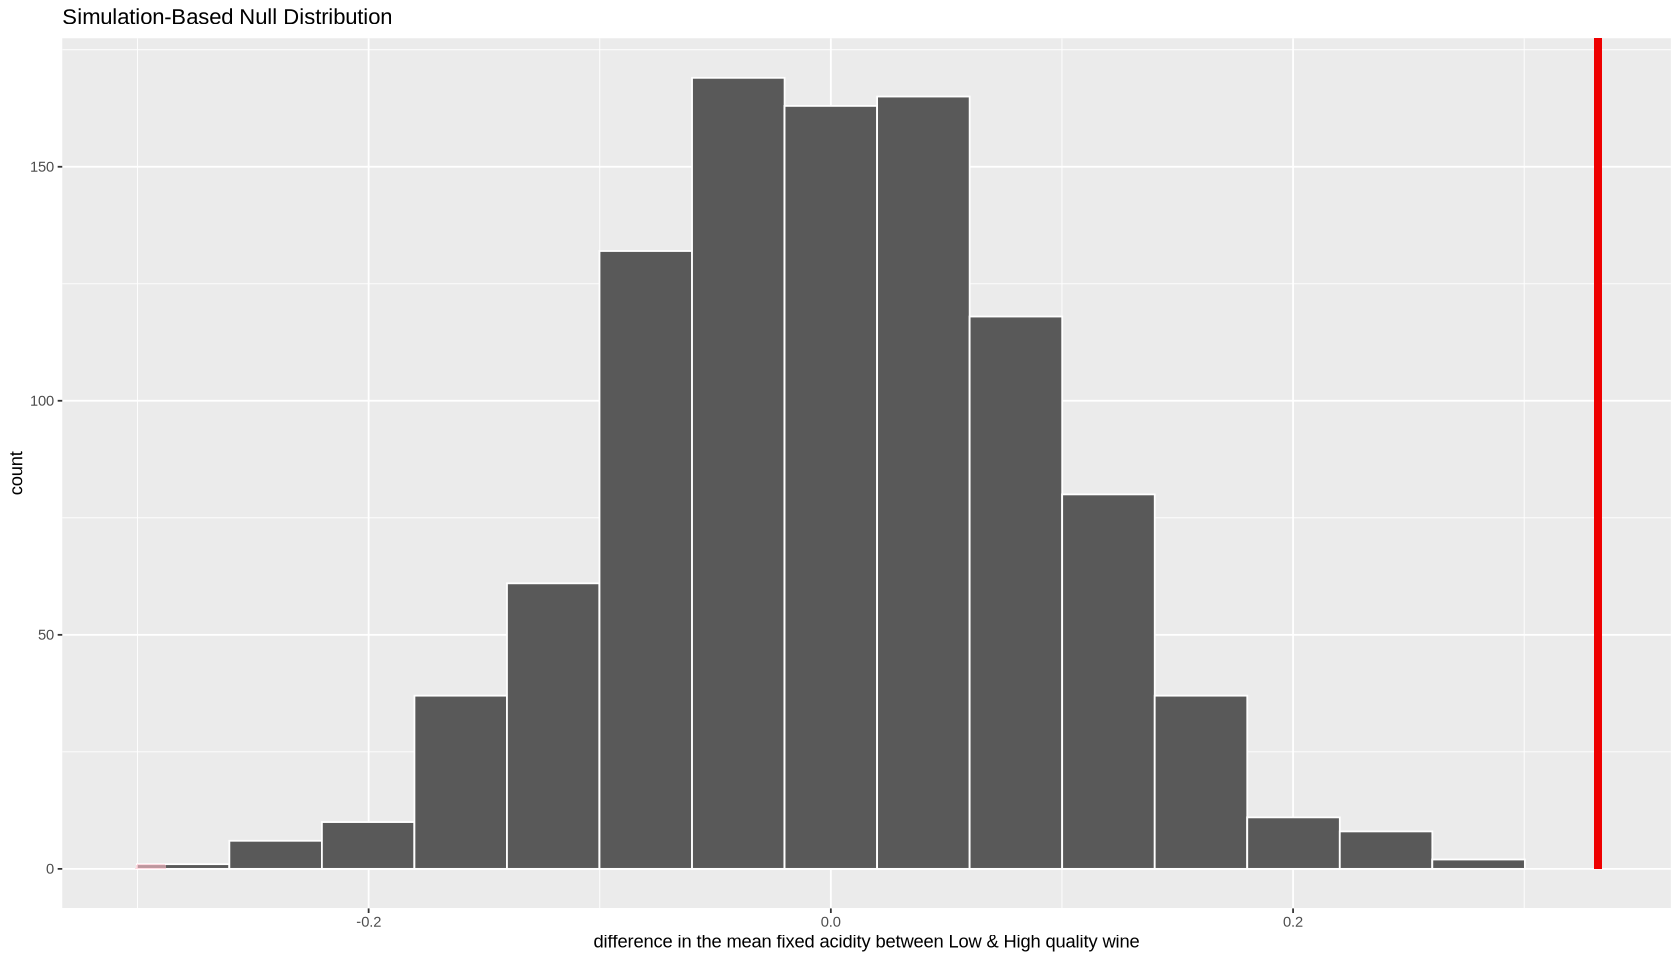

In [ ]:
set.seed(123)
#Calculating the observed mean difference in fixed acidity
obs_mean_fa_diff <-
     wine_quality_fa %>%
    filter(quality %in% c("LOW", "HIGH")) %>%
     group_by(quality) %>%
     summarise(mean = mean(fixed_acidity)) %>%
     pivot_wider(names_from = quality, values_from = mean) %>%
     transmute(diff = HIGH-LOW) %>%
     pull(diff)
print(paste("The observed mean difference in fixed acidity :", obs_mean_fa_diff))

#Simulating from the null distribution
null_model_fa <-
   wine_quality_fa %>%
    specify(formula = fixed_acidity~quality) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat="diff in means", order = c("HIGH", "LOW"))

null_model_fa_plot <-
    null_model_fa %>%
    visualize() +
    xlab("difference in the mean fixed acidity between Low & High quality wine")+
    shade_p_value(obs_stat = obs_mean_fa_diff, direction = "two.sided")

null_model_fa_plot
options(digits=15)
fa_p_value <- null_model_fa %>%
get_p_value(obs_stat = obs_mean_fa_diff, direction = "two.sided")|>
pull()
print(paste("The p value is : < 0.001"))

Figure 5

Simulating from the null distribution

We know p-value is approximately 0.0001, which is less than $\alpha = 0.1$, so we reject the null hypothesis. So that the mean of `volatile_acidity` would be significantly different between "LOW" and "HIGH" quality red wine.

[1] "The observed mean difference in volatile acidity : -0.115356489341634"


Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


[1] "The p value is : < 0.001"


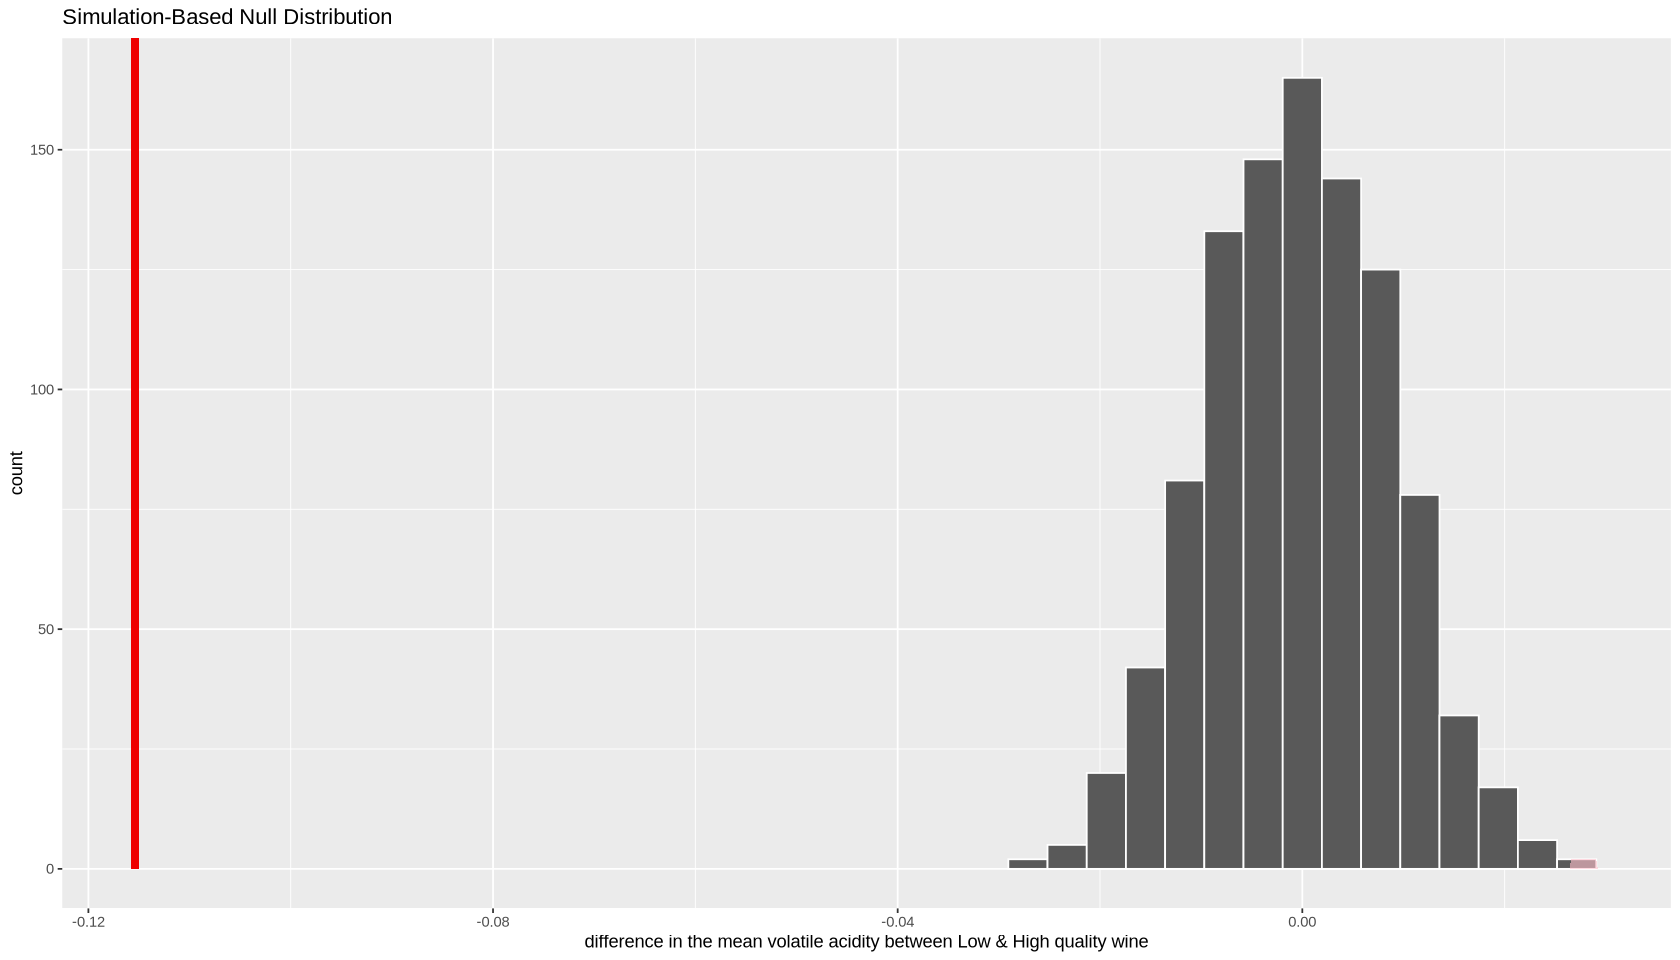

In [ ]:
set.seed(123)
#Calculating the observed mean difference in volatile acidity
obs_mean_va_diff <-
     wine_quality_va %>%
    filter(quality %in% c("LOW", "HIGH")) %>%
     group_by(quality) %>%
     summarise(mean = mean(volatile_acidity)) %>%
     pivot_wider(names_from = quality, values_from = mean) %>%
     transmute(diff = HIGH-LOW) %>%
     pull(diff)
print(paste("The observed mean difference in volatile acidity :", obs_mean_va_diff))

#Simulating from the null distribution
null_model_va <-
   wine_quality_va %>%
    specify(formula = volatile_acidity~quality) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat="diff in means", order = c("HIGH", "LOW"))

null_model_va_plot <-
    null_model_va %>%
    visualize() +
    xlab("difference in the mean volatile acidity between Low & High quality wine")+
    shade_p_value(obs_stat = obs_mean_va_diff, direction = "two.sided")

null_model_va_plot
va_p_value <- null_model_va %>%
get_p_value(obs_stat = obs_mean_va_diff, direction = "two.sided")|>
pull()
print(paste("The p value is : < 0.001"))

Figure 6

<font size="5">Conducting Hypothesis testing using two sample t test</font>

<font size="3">Constructing Hypothesis testing through two sample t-test for `fixed_acidity`</font>

`ggplot()` visualize the distributions of fixed acidity across each category of wine quality.

Checking whether the distribution for both the samples is roughly normal to use the null model.
- Filter out the two types of red wine quality separately using `filter()` and store the data in `wine_quality_fa_h` and `wine_quality_fa_l` respectively.
- `ggplot()` visualize the distributions of `wine_quality_fa_h` and `wine_quality_fa_l` respectively, and using `geom_histogram()` to turn the visualization into a histogram.

Both distributions have only one peak each and are approximately symmetric, so the distribution for both the samples is roughly normal.

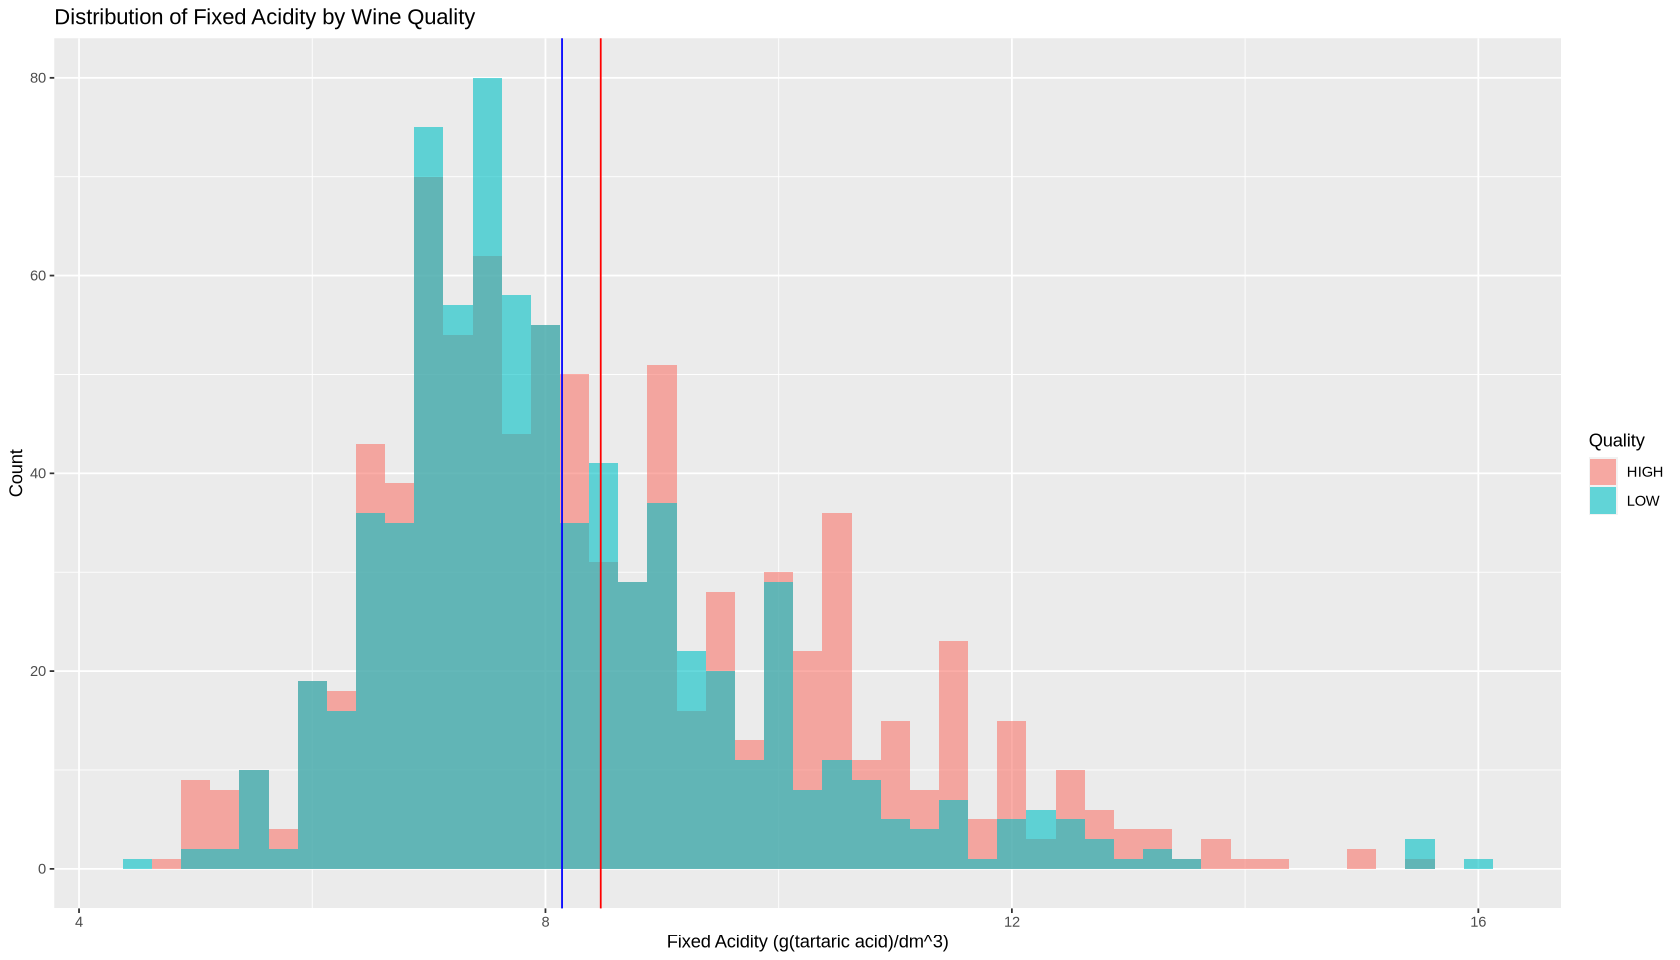

In [ ]:
# Wine quality data selecting quality and fixed acidity
wine_quality_fa <- wine_data |>
select(quality,fixed_acidity)

#Checking whether the distribution for both the samples is roughly normal to use the null model
fixed_plot

Two sample t_test\
Use `t.test()` to compute test statistic and p.value, filter "HIGH" quality red wine to X, filter "LOW" quality red wine to Y, and set alternative as "two.sided", conf.level as 0.90.\
conclusion: test statistic is 3.86224833222984, p-value is 0.000116839973842088 and confidence interval is [0.1904287	, 0.4732329].

In [ ]:
#Two sample t_test
fa_t_test <-
    broom::tidy(
        t.test(x = filter(wine_quality_fa, quality == "HIGH")$fixed_acidity,
               y = filter(wine_quality_fa, quality == "LOW")$fixed_acidity,
               alternative = "two.sided",conf.level = 0.90))

fa_t_test
print(paste("The test statistic:", fa_t_test$statistic))
print(paste("The p value", fa_t_test$p.value))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.33183078664403,8.4740350877193,8.14220430107527,3.86224833222984,0.000116839973842088,1595.54640370029,0.190428651356126,0.473232921931934,Welch Two Sample t-test,two.sided


[1] "The test statistic: 3.86224833222984"
[1] "The p value 0.000116839973842088"


<font size="3">Constructing Hypthesis testing through two sample t-testg for `volatile_acidity`</font>

Same method as before, except that instead the variable `fixed_acidity` by `volatile_acidity`.

Checking whether the distribution for both the samples is roughly normal to use the null model.

Both distributions have only one peak each and are approximately symmetric, so the distribution for both the samples is roughly normal.

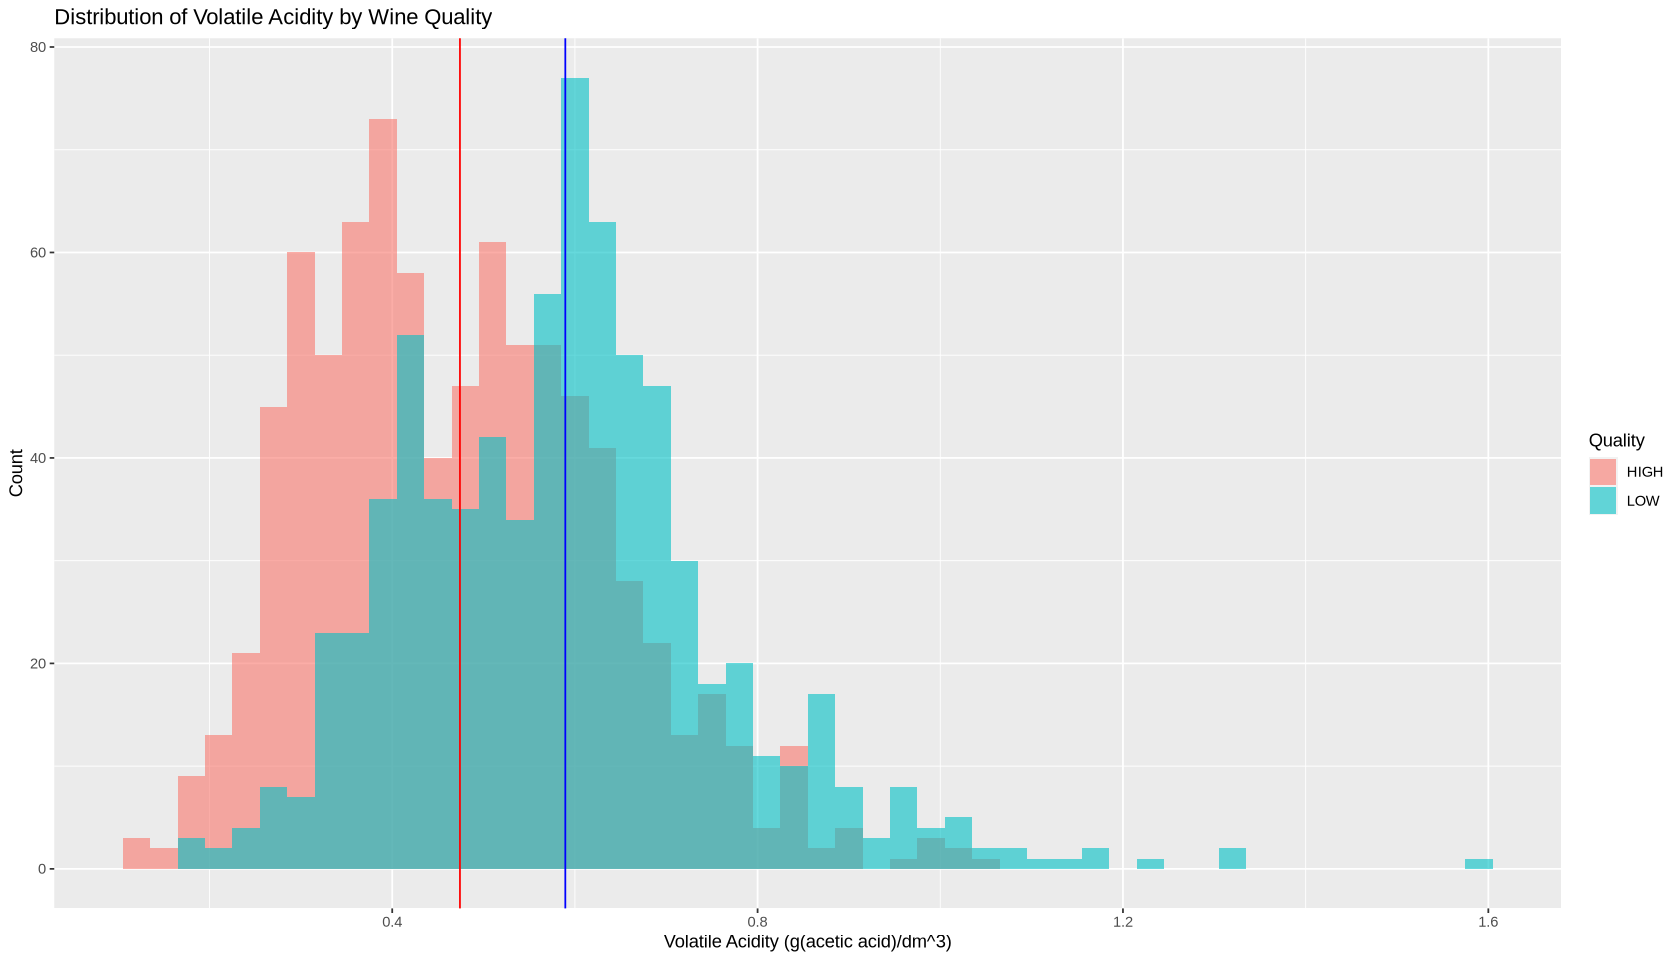

In [ ]:
#Checking whether the distribution for both the samples is normal to use the null model
volatile_plot

Two sample t_test

conclusion: test statistic is -13.477521427970, p-value is 3.48073532887764e-39 and confidence interval is [-0.1294437, -0.1012693].

In [ ]:
# Two sample t-test
va_t_test <-
    broom::tidy(
        t.test(x = filter(wine_quality_va, quality == "HIGH")$volatile_acidity,
               y = filter(wine_quality_va, quality == "LOW")$volatile_acidity,
               alternative = "two.sided",conf.level = 0.90))


va_t_test
print(paste("The test statistic:", va_t_test$statistic))
print(paste("The p value", va_t_test$p.value))

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.115356489341634,0.474146198830409,0.589502688172043,-13.4775214279703,3.48073532887764e-39,1515.36570449214,-0.129443694357386,-0.101269284325881,Welch Two Sample t-test,two.sided


[1] "The test statistic: -13.4775214279703"
[1] "The p value 3.48073532887764e-39"


## Discussion

P-values obtained by asymptotics are 0.000116839973842088 and 3.48073532887764e-39, respectively, all rejecting the null hypothesis. This is because all p-values are less than a significant level. This means that fixed acidity and volatile acidity differ between different qualities of red wine. The acidity of wines differs between good and poor quality red wines, offering considerable value for determining red wine quality. Checking the acidity of red wine might help consumers pick the finest wine for their requirements. The two confidence intervals obtained by asymptotics were [0.1905108, 0.4731508], [-0.1294351, -0.1012779], respectively. We can see that the confidence interval for volatile acidity is negative because the excessive volatile acidity in wine can lead to deterioration, resulting in a pungent flavour (Vilela-Moura et al., 2011). That's why high-quality red wine has less volatile acidity than lower-quality red wine.
Our findings support the initial expectation that high and low-quality red wines exhibit significant differences in acidity. The extreme p-values and confidence intervals validate our expectations. This implies that acidity is a critical element in determining a red wine's quality
In the future, we can investigate the chemical composition of acidity in greater detail to determine which components have the greatest impact on different qualities of red wine.

## Conclusion

Our observations indicated highly statistically significant p-values for Fixed Acidity and Volatile Acidity. Consequently, we reject the null hypothesis for both variables. In other words, we have found that different qualities of red wine have different amounts of fixed acidity and volatile acidity. In an attempt to explain our findings, we found deterioration of wine due to excess volatile acidity as one of the underlying reasons for the poor quality of the wine. To summarize, this research not only allowed us to qualitatively prove the existence of inherent differences between different qualities of wine but also allowed us to link these findings to other studies to investigate the rationale behind these differences.

### References

- Ferrer, J., Huang, Z., Kiang, M., Moreno, I., Shaw, M., Wang, W., Asuncion, A., Bi, J., Bishop, C., Boser, B., Cherkassy, V., Cortez, P., Dietterich, T., Ebeler, S., &amp; Fao. (2009, June 9). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems. https://www.sciencedirect.com/science/article/pii/S0167923609001377  
- UCI Machine Learning Repository: Wine Quality Data Set. (n.d.). UCI. https://archive.ics.uci.edu/ml/datasets/wine+quality
- Vilela-Moura, A., Schuller, D., Mendes-Faia, A., Silva, R. D., Chaves, S. R., Sousa, M. J., & Côrte-Real, M. (2011). impact of acetate metabolism on yeast fermentative performance and wine quality: Reduction of volatile acidity of grape musts and wines. Applied Microbiology and Biotechnology, 89(2), 271-280. https://doi.org/10.1007/s00253-010-2898-3
- White, N. A. (2019, March 18). Fixed acidity. Waterhouse Lab. https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity
- White, N. A. (2019, March 18). Volatile acidity. Waterhouse Lab. https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity